# Exercise set 9: Network 1

In [1]:
import matplotlib.pylab as plt
import networkx as nx # library for working with networks
import pandas as pd
from collections import Counter
from netwulf import visualize
import matplotlib.pyplot as plt
import numpy as np

Ex. 9.0.1: List three different real networks and state the nodes and links for each of them.

1) Social network on Facebook. Nodes are individuals, links are friendships.
2) The spread of a disease. Nodes are individuals, links are contagion.
3) Shipping map. Nodes are harbors, links are shipping routes.

Ex. 9.0.2: What networks are you personally most interested in. Address the following questions:

1) What are its nodes and links?

Corporations' organisational networks. Nodes are individuals, links are different forms of communication, e.g. e-mails, meetings, phone calls etc.

2) How large is it?

N = number of employees - can be both large and small, but never extremely large compared to e.g. the network of neurons in the human body.

3) Can be mapped out?

Yes

4) Why do you care about it?

I think the example of Maven 7's work is really interesting, because the interpretation of the hubs is so straight forward and meaningful to the company.
The hubs indicate individuals with a broad contact to other employees, and in the case from the text, they showed, that the individuals
with widest contact actually wasn't the top management but rather employees of lower ranks.


Ex. 9.0.3: In your view what would be the area where network science could have the biggest impact in the
next decade? Explain your answer - and base it on the text in the book.

The estimation of the way highly contagious diseases spread. I think, that with the current pandemic in mind, the demand for even better methods of estimating the spread of diseases will increase in the next decade. As the text exemplifies with the case of H1N1, it is actually possible to successfully predict the spread of a pandemic in real-time, but I think that society will benefit from better and more robust methods of doing so.

Ex. 9.0.4: Section 2.5 states that real networks are sparse. Can you think of a real network where each
node has many connections? Is that network still sparse? If yes, can you explain why?

The human brain. Each neuron can have up to 10.000 links, but the network is still sparse, because the total number of links is way smaller than the maximal number of links (if all neurons were connected).

# Part 1: The NetworkX library

Ex. 9.1.1:

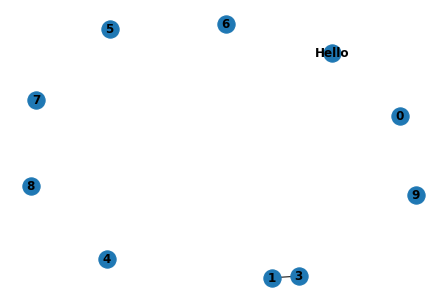

In [3]:
G = nx.Graph()

### 1) add some nodes and edges to

G.add_node('Hello')
G.add_nodes_from([1,2,3])

H = nx.path_graph(10)
G.add_nodes_from(H)

G.add_edge(1, 2)
G.add_edges_from([(1, 2), (1, 3)])

### 2) print its nodes and edges

G.nodes
G.edges

G.number_of_edges()
G.number_of_nodes()

### 3) delete a node

G.remove_node(2)
G.nodes

### 4) plot it.

nx.draw(G, with_labels=True, font_weight='bold')

Ex. 9.1.2:

(array([ 2., 13., 16., 16., 11., 21., 11.,  6.,  3.,  1.]),
 array([ 5. ,  6.4,  7.8,  9.2, 10.6, 12. , 13.4, 14.8, 16.2, 17.6, 19. ]),
 <a list of 10 Patch objects>)

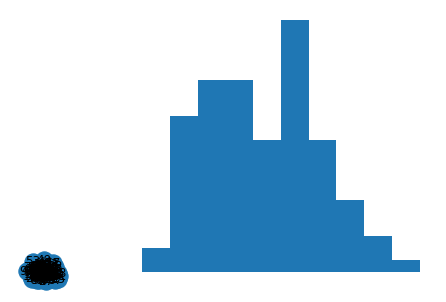

In [5]:
### 1) Describe what an ER network is and how to create one.

# The ER network is a binomial graph, that has n nodes and for each possible edge the edge is created with 
# possibility p.

### 2) On the NetworkX documentations site, find a method you can use for generating an ER network. Create one with
### 𝑁=100  nodes and probability of edge creation  𝑝=0.1 .

n = 100
p = 0.1

ER_graph = nx.binomial_graph(n=n,p=p)

### 3) Plot the network.
nx.draw(ER_graph, with_labels=True)

### 4) Visualize the degree distribution of your newly created ER graph.

degrees = [ER_graph.degree[i] for i in range(len(ER_graph))]
plt.hist(degrees)

Ex. 9.1.3:

(array([67., 10.,  7.,  4.,  6.,  1.,  1.,  0.,  3.,  1.]),
 array([ 2. ,  3.5,  5. ,  6.5,  8. ,  9.5, 11. , 12.5, 14. , 15.5, 17. ]),
 <a list of 10 Patch objects>)

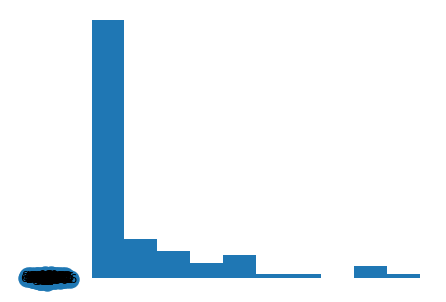

In [6]:
### 1) Describe what a BA network is and how to create one.

# The BA network is created sequentially by adding one node at a time. Each new node has m edges, and these edges are
# attached to the existing nodes with the highest degree, i.e. with the highest number of edges.

### 2) On the NetworkX documentations site, find a method you can use for generating a BA network. Create one with
### 𝑁=100 nodes and number of new edges from each new node  𝑚=2 .

n = 100
m = 2

BA_graph = nx.barabasi_albert_graph(n=n, m=m)

### 3) Plot the network.

nx.draw(BA_graph, with_labels=True)

### 4) Visualize the degree distribution of your newly created BA graph.

degrees = [BA_graph.degree[i] for i in range(len(ER_graph))]
plt.hist(degrees)

### 5) Explain the main difference(s) you observe, when comparing to the ER network.

# The degree distribution of the BA graph is very right skewed. This is because the edges of the new nodes are attahced to the
# nodes with the highest degree. Thus, the new edges keep being attached to the same nodes, and network ends up having a large
# number of nodes with low degree and a small number og nodes with high degree.

### 6) Are there other measures we could have used to describe the ER and BA networks further?

# Part 2: Facebook network

In [8]:
# load data:
data = pd.read_csv(
    "facebook-wall.txt",
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)

data.head(10)

,user1,user2,timestamp
0,28,28,1095135831
1,1015,1017,1097725406
2,959,959,1098387569
3,991,991,1098425204
4,1015,1017,1098489762
5,1015,1017,1098673897
6,3368,3368,1098755376
7,14752,14736,1099526971
8,1015,1017,1099602800
9,1531,1080,1099889279


Ex. 9.2.1:

In [9]:
# we'll only use a subset of the dataset - last 365 days
t0 = data.timestamp.max() - 86400 * 365  # Lower bound of time-slice (here: 365 days before last wall post)
t1 = data.timestamp.max()              # Upper bound of time-slice

def slicer(t0, t1):
    # Subset of the pandas dataframe
    data_t = data.loc[data.timestamp.between(t0, t1)]

    # Count the number of times each link occurs and store that in a new 'weight' column
    data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

    # Create a `nx.DiGraph` from this dataframe
    return nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph) # Directed graph

G_t = slicer(t0=t0, t1=t1)

G_t.number_of_edges() # 201.632 edges
G_t.number_of_nodes() # 44.397 nodes

44397

Ex. 9.2.2:

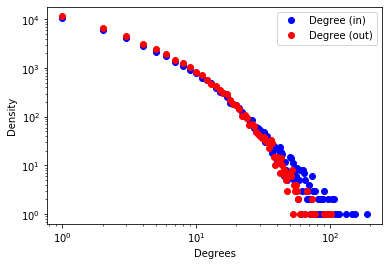

In [10]:
def degree_count(degrees):
    degree_count = Counter([degree for n,degree in degrees])
    degrees, count = zip(*degree_count.items())
    return degrees, count


degrees_in, count_in = degree_count(G_t.in_degree)
degrees_out, count_out = degree_count(G_t.out_degree)

plt.plot(degrees_in, count_in, 'bo', label = 'Degree (in)')
plt.plot(degrees_out, count_out, 'ro', label = 'Degree (out)')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Degrees')
plt.ylabel('Density')
plt.legend()

It looks a lot like the BA network - it's very right skewed.

Ex. 9.2.3:

(array([535., 347., 463., 312., 398., 262., 231., 283., 269., 327., 748.,
        161., 177., 232., 434., 150., 364., 127., 158., 341., 132., 138.,
        101., 154.,  93., 483.,  56.,  53.,  98., 220.,  61.,  57.,  46.,
         28., 769.,  22.,  32.,  16.,  74.,   3.,  72.,  20.,  41.,   9.,
         12.,  24.,   9.,   2., 767.]),
 array([0.1       , 0.10481131, 0.10985411, 0.11513954, 0.12067926,
        0.12648552, 0.13257114, 0.13894955, 0.14563485, 0.1526418 ,
        0.15998587, 0.16768329, 0.17575106, 0.184207  , 0.19306977,
        0.20235896, 0.21209509, 0.22229965, 0.23299518, 0.24420531,
        0.25595479, 0.26826958, 0.28117687, 0.29470517, 0.30888436,
        0.32374575, 0.33932218, 0.35564803, 0.37275937, 0.39069399,
        0.40949151, 0.42919343, 0.44984327, 0.47148664, 0.49417134,
        0.51794747, 0.54286754, 0.5689866 , 0.59636233, 0.62505519,
        0.65512856, 0.68664885, 0.71968567, 0.75431201, 0.79060432,
        0.82864277, 0.86851137, 0.91029818, 0.954095

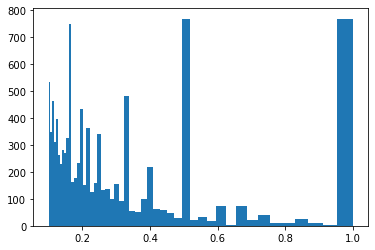

In [11]:
cluster = nx.clustering(G_t)

plt.hist(sorted(cluster.values()), bins=np.logspace(np.log10(0.1),np.log10(1.0), 50))

Ex. 9.2.4: